# PRÁCTICA FINAL: MACHINE LEARNING

**PARTICIPANTES**

- David Joel Simbaña Fierro

- Roberto Martínez Fernández

- María Tornero Mateo



# INTRODUCCIÓN

Se tiene una base de datos de una aseguradora sobre los accidentes automovísticos ocurridos en Canadá entre 1999 y 2014. Los datos están recogidos de tal manera que cada observación hace referencia a una persona diferente que ha estado dentro del vehículo en el momento de la colisión. Por ejemplo, si en una colisión entre dos coches había cuatro personas en cada uno de ellos, ese accidente produce ocho observaciones distintas.

En esta práctica, se han establecido los siguientes **objetivos**:
- Indicar qué tipos de vehículos (así como su antigüedad) y de conductores son más y menos propensos a tener accidentes.
- Encontrar un modelo de clasificación que permita predecir si en un accidente habrá fallecidos o no, así como hacer una correcta selección de características para ello.
- Encontrar otro clasificador para predecir si la persona involucrada en el accidente requerirá tratamiento médico o no.
- Establecer otras posibles relaciones con los accidentes, como el estado de la carretera o el clima en el momento del accidente.


# ANÁLISIS EXPLORATORIO. ESTUDIO DE LAS VARIABLES

Importamos las librerías necesarias y cargamos nuestro conjunto de datos.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt   
from scipy import stats          
%matplotlib inline     
sns.set(color_codes=True)

In [2]:
df = pd.read_csv('NCDB_1999_to_2014.csv')
df.head().T

C:\Users\mariq\AppData\Local\Temp\ipykernel_35528\271698340.py:1: DtypeWarning: Columns (1,2,5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NCDB_1999_to_2014.csv')


,0,1,2,3,4
C_YEAR,1999,1999,1999,1999,1999
C_MNTH,1,1,1,1,1
C_WDAY,1,1,1,1,1
C_HOUR,20,20,20,08,08
C_SEV,2,2,2,2,2
C_VEHS,02,02,02,01,01
C_CONF,34,34,34,01,01
C_RCFG,UU,UU,UU,UU,UU
C_WTHR,1,1,1,5,5
C_RSUR,5,5,5,3,3


Ahora veamos el tipo de variables que tenemos y la cantidad de observaciones disponibles.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860405 entries, 0 to 5860404
Data columns (total 22 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   C_YEAR  int64 
 1   C_MNTH  object
 2   C_WDAY  object
 3   C_HOUR  object
 4   C_SEV   int64 
 5   C_VEHS  object
 6   C_CONF  object
 7   C_RCFG  object
 8   C_WTHR  object
 9   C_RSUR  object
 10  C_RALN  object
 11  C_TRAF  object
 12  V_ID    object
 13  V_TYPE  object
 14  V_YEAR  object
 15  P_ID    object
 16  P_SEX   object
 17  P_AGE   object
 18  P_PSN   object
 19  P_ISEV  object
 20  P_SAFE  object
 21  P_USER  object
dtypes: int64(2), object(20)
memory usage: 983.6+ MB


**¿Hay duplicados?**

Veámoslo. En caso afirmativo los eliminaremos.

In [4]:
df.duplicated().sum() 

5069

In [5]:
df=df.drop_duplicates()
df.duplicated().sum()

0

**Valores desconocidos:**


Hemos observado que las variables pueden tomar valores que nos dan la misma información que nos daría un valor missing. Estos valores son 'desconocido', 'no se puede facilitar esta información',etc. Por ello, eliminaremos las observaciones que tengan estos valores en alguna de sus variables.

Para eliminarlos, primero los convertiremos en missings y después eliminaremos estos missings.

In [6]:
def eliminar_observaciones(df):
    valores_a_eliminar = ['U', 'X', 'UU','N','NN','NNNN','UUUU','XX','XXXX', 'Q', 'QQ']
    df = df[~df.isin(valores_a_eliminar)]
    return df

In [7]:
df = eliminar_observaciones(df)
df.head(10)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,NaN,1,5,...,01,06,1990,01,M,41,11,1,NaN,1
1,1999,1,1,20,2,02,34,NaN,1,5,...,02,01,1987,01,M,19,11,1,NaN,1
2,1999,1,1,20,2,02,34,NaN,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,NaN,5,3,...,01,01,1986,01,M,46,11,1,NaN,1
4,1999,1,1,08,2,01,01,NaN,5,3,...,99,NaN,NaN,01,M,05,99,2,NaN,3
5,1999,1,1,17,2,03,NaN,NaN,1,2,...,01,01,1984,01,M,28,11,1,NaN,1
6,1999,1,1,17,2,03,NaN,NaN,1,2,...,02,01,1991,01,M,21,11,1,NaN,1
7,1999,1,1,17,2,03,NaN,NaN,1,2,...,02,01,1991,02,F,NaN,13,2,NaN,2
8,1999,1,1,17,2,03,NaN,NaN,1,2,...,03,01,1992,01,M,NaN,11,2,NaN,1
9,1999,1,1,15,2,01,04,NaN,1,5,...,01,01,1997,01,M,61,11,1,NaN,1


In [8]:
na_ratio = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
print(na_ratio)

P_SAFE    21.057596
C_RCFG    11.080833
V_YEAR     9.959770
C_CONF     7.919733
C_RALN     7.911126
P_AGE      6.732918
P_ISEV     6.341105
C_TRAF     5.216763
V_TYPE     4.827494
P_SEX      4.254769
C_RSUR     4.246195
P_USER     2.996498
C_WTHR     1.758447
P_PSN      1.667488
C_HOUR     1.014528
P_ID       0.187641
C_WDAY     0.022595
C_VEHS     0.009291
V_ID       0.007395
C_MNTH     0.006575
C_SEV      0.000000
C_YEAR     0.000000
dtype: float64


**Eliminamos los missings**:

Debido al conjunto de datos tan grande que tenemos (alrededor de 5.000.000 de observaciones) eliminaremos las observaciones que tengan al menos un missing en sus variables para reducir tanto el coste computacional, como el tiempo de ejecucción. 

In [9]:
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3292291 entries, 52 to 5860380
Data columns (total 22 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   C_YEAR  int64 
 1   C_MNTH  object
 2   C_WDAY  object
 3   C_HOUR  object
 4   C_SEV   int64 
 5   C_VEHS  object
 6   C_CONF  object
 7   C_RCFG  object
 8   C_WTHR  object
 9   C_RSUR  object
 10  C_RALN  object
 11  C_TRAF  object
 12  V_ID    object
 13  V_TYPE  object
 14  V_YEAR  object
 15  P_ID    object
 16  P_SEX   object
 17  P_AGE   object
 18  P_PSN   object
 19  P_ISEV  object
 20  P_SAFE  object
 21  P_USER  object
dtypes: int64(2), object(20)
memory usage: 577.7+ MB


Convertimos la variable P_SEX, que nos indica el género del pasajero, en una variable que tomará los valores 0 (si es mujer), y 1 (si es hombre)

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["P_SEX"] = le.fit_transform(df["P_SEX"])
df['P_SEX'].value_counts()

1    1774778
0    1517513
Name: P_SEX, dtype: int64

**Convertimos las columnas a tipo float**

Para poder analizar bien los datos y ejecutar posterioirmente los algoritmos, convertimos las variables numéricas (que ahora son variables object), en variables que toman valores de números reales. 

Además, creamos la variable C_DATE, que nos indicará la fecha de la colisión. Hay que tener en cuenta que la variable C_WDA y, que indica el día de la semana que tuvo lugar el accidente, toma valores del 1 al 7 (lunes a domingo), con lo cuál no va a ser un formato de fecha usual (ya que no abarcamos del día 1 hasta el 28/30/31 que tiene un mes.

In [11]:
col_float=['C_SEV', 'C_VEHS','C_CONF', 'C_RCFG' ,'C_WTHR','C_RSUR','C_RALN',
           'C_TRAF','V_ID','V_TYPE','V_YEAR','P_ID','P_SEX','P_AGE','P_PSN','P_ISEV','P_SAFE','P_USER' ]
col_str=['C_YEAR' ,'C_MNTH','C_WDAY','C_HOUR']
df[col_float] = df[col_float].astype(float)
df[col_str]= df[col_str].astype(str)

In [12]:
df['C_DATE'] = pd.DatetimeIndex(df['C_YEAR'].map(str) + '-' + df['C_MNTH'])
df.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_DATE
52,1999,1,1,09,2.0,2.0,34.0,2.0,1.0,1.0,...,1.0,1992.0,1.0,0.0,33.0,11.0,2.0,2.0,1.0,1999-01-01
54,1999,1,1,09,2.0,2.0,34.0,2.0,1.0,1.0,...,1.0,1992.0,1.0,0.0,70.0,11.0,1.0,2.0,1.0,1999-01-01
125,1999,1,1,20,2.0,1.0,3.0,3.0,1.0,1.0,...,1.0,1988.0,1.0,0.0,38.0,11.0,2.0,2.0,1.0,1999-01-01
141,1999,1,1,05,2.0,2.0,1.0,2.0,3.0,2.0,...,6.0,1995.0,1.0,1.0,34.0,11.0,1.0,2.0,1.0,1999-01-01
142,1999,1,1,05,2.0,2.0,1.0,2.0,3.0,2.0,...,6.0,1995.0,2.0,1.0,30.0,13.0,1.0,2.0,2.0,1999-01-01


In [13]:
col_float=['C_YEAR' ,'C_MNTH','C_WDAY','C_HOUR']
df[col_float] = df[col_float].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3292291 entries, 52 to 5860380
Data columns (total 23 columns):
 #   Column  Dtype         
---  ------  -----         
 0   C_YEAR  float64       
 1   C_MNTH  float64       
 2   C_WDAY  float64       
 3   C_HOUR  float64       
 4   C_SEV   float64       
 5   C_VEHS  float64       
 6   C_CONF  float64       
 7   C_RCFG  float64       
 8   C_WTHR  float64       
 9   C_RSUR  float64       
 10  C_RALN  float64       
 11  C_TRAF  float64       
 12  V_ID    float64       
 13  V_TYPE  float64       
 14  V_YEAR  float64       
 15  P_ID    float64       
 16  P_SEX   float64       
 17  P_AGE   float64       
 18  P_PSN   float64       
 19  P_ISEV  float64       
 20  P_SAFE  float64       
 21  P_USER  float64       
 22  C_DATE  datetime64[ns]
dtypes: datetime64[ns](1), float64(22)
memory usage: 602.8 MB


### **ESTUDIO GRÁFICO DE LAS VARIABLES**

Queremos analizar las variables y su relación con la ocurrencia o no de un accidente. Para ello, filtraremos nuestro dataset, tomando solo las observaciones que toman la posición del conductor como persona afectada y así evitar observaciones repetidas. Como hemos comentado antes, si hay n personas implicadas en el accidente, habrá n observaciones que tendrán las mismas características (clima, estado de la calzada, etc)

In [15]:
df_c = df[df['P_PSN'] == 11]
df_c

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_DATE
52,1999.0,1.0,1.0,9.0,2.0,2.0,34.0,2.0,1.0,1.0,...,1.0,1992.0,1.0,0.0,33.0,11.0,2.0,2.0,1.0,1999-01-01
54,1999.0,1.0,1.0,9.0,2.0,2.0,34.0,2.0,1.0,1.0,...,1.0,1992.0,1.0,0.0,70.0,11.0,1.0,2.0,1.0,1999-01-01
125,1999.0,1.0,1.0,20.0,2.0,1.0,3.0,3.0,1.0,1.0,...,1.0,1988.0,1.0,0.0,38.0,11.0,2.0,2.0,1.0,1999-01-01
141,1999.0,1.0,1.0,5.0,2.0,2.0,1.0,2.0,3.0,2.0,...,6.0,1995.0,1.0,1.0,34.0,11.0,1.0,2.0,1.0,1999-01-01
147,1999.0,1.0,1.0,8.0,2.0,3.0,33.0,2.0,4.0,2.0,...,1.0,1989.0,1.0,1.0,18.0,11.0,2.0,2.0,1.0,1999-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860369,2014.0,12.0,7.0,21.0,2.0,2.0,35.0,3.0,2.0,1.0,...,1.0,2011.0,1.0,1.0,72.0,11.0,1.0,2.0,1.0,2014-12-01
5860372,2014.0,12.0,7.0,0.0,2.0,1.0,4.0,1.0,2.0,2.0,...,1.0,1994.0,1.0,1.0,49.0,11.0,2.0,2.0,1.0,2014-12-01
5860373,2014.0,12.0,7.0,18.0,2.0,1.0,2.0,1.0,2.0,5.0,...,1.0,2010.0,1.0,1.0,20.0,11.0,1.0,2.0,1.0,2014-12-01
5860376,2014.0,12.0,7.0,14.0,2.0,2.0,41.0,1.0,1.0,5.0,...,5.0,2008.0,1.0,1.0,44.0,11.0,1.0,2.0,1.0,2014-12-01


**DÍA DE LA SEMANA** 

Primero nos preguntamos si el número de accidentes varía significativamente con respecto al día de a semana. Para comprobarlo, representaremos un gráfico del número de accidentes agrupados por el día de la semana

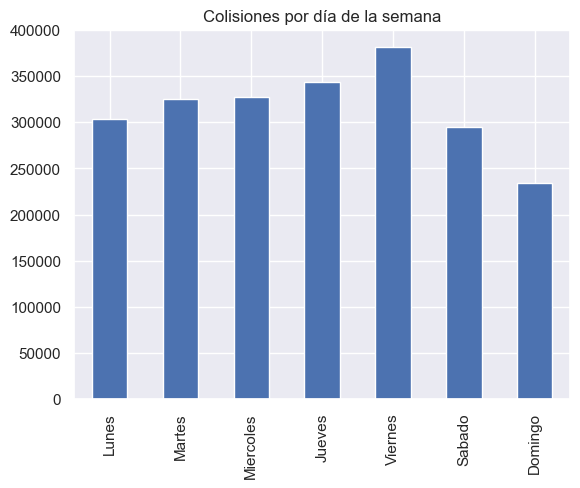

In [16]:
by_weekday = df_c.groupby('C_WDAY').size()
by_weekday.index = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
plot2 = by_weekday.plot(kind='bar',title='Colisiones por día de la semana');

Observamos que la distribución es bastante homogénea, liderando los viernes y en la cola los domingos. Esto se puede deber a que la gente coge menos el coche los domingos y más los viernes (por ejemplo, para irse de fin de semana).

**HORA DEL ACCIDENTE** 

Planteamos la misma pregunta, pero con respecto a las horas del día. Para comprobarlo sacaremos un gráfico del número de accidentes por hora.

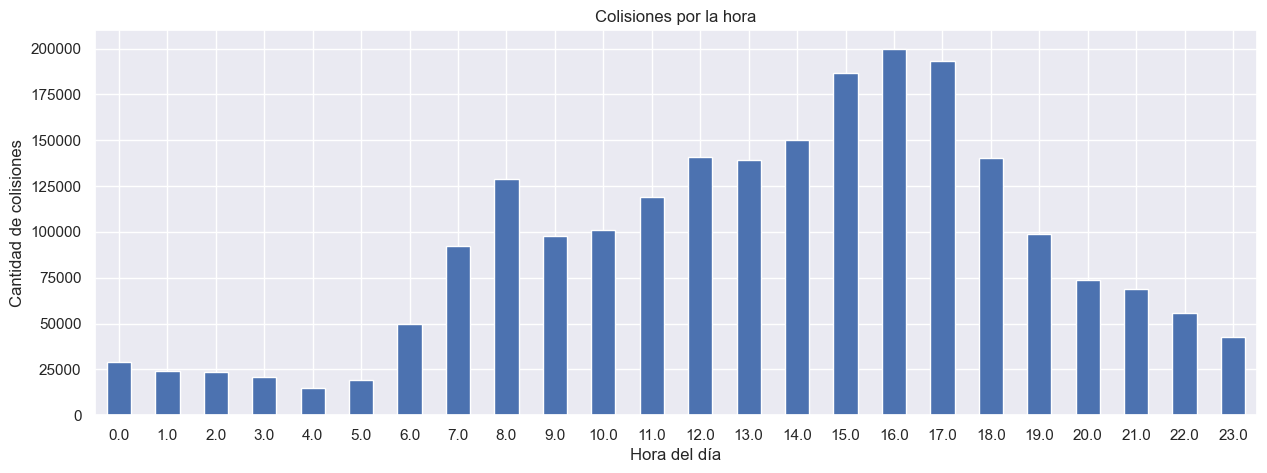

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

by_hour = df_c.groupby('C_HOUR').size()
plot3 = by_hour.plot(kind='bar', title='Colisiones por la hora')

plt.xlabel('Hora del día')
plt.ylabel('Cantidad de colisiones')
plt.xticks(rotation=0)

plt.show()


Observamos que hay una gran diferencia entre el número accidentes según la hora del día ya que, razonablemente, de 12 a 6 de la mañana hay menos coches en las carreteras. Por otro lado, el intervalo horario en el que hay mas accidentes es de 15 a 17, que puede coincidir con la vuelta del trabajo en coche.

**AÑO DE LA COLISIÓN**

¿Ha variado el número de accidentes por año? Veámoslo.

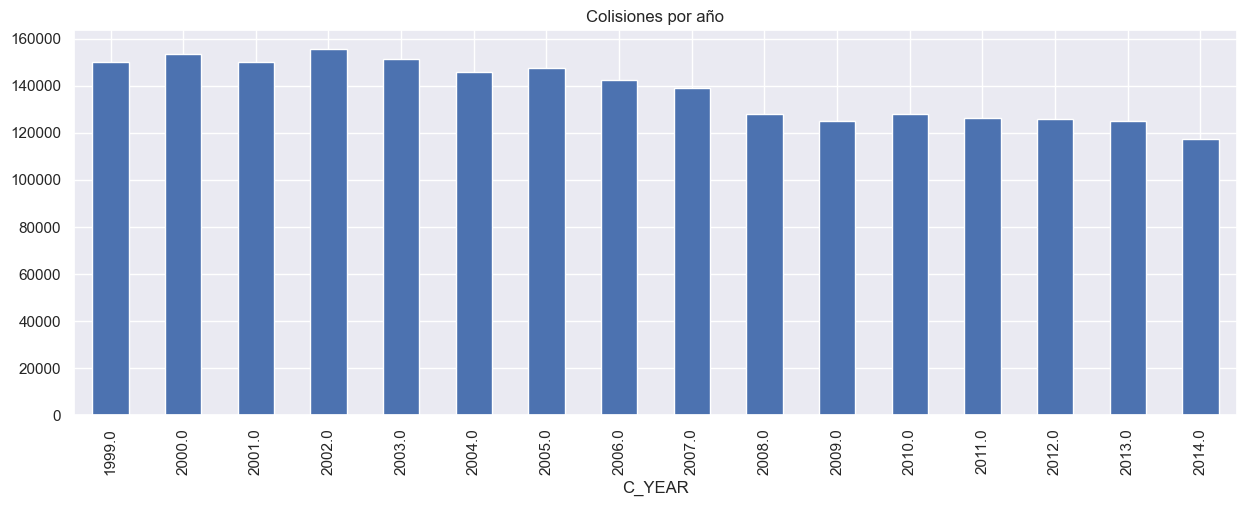

In [18]:
plt.figure(figsize=(15,5))
by_hour = df_c.groupby('C_YEAR').size()
plot3 = by_hour.plot(kind='bar',title='Colisiones por año')

Ha descendido ligeramente. Puede deberse a la mejoría en las carreteras o a las mejoras en medidas de seguridad de los nuevos transportes.

**NÚMERO DE FALLECIMIENTOS**

Veamos como ha evolucionado el número de fallecimiento en accidentes de tráfico a lo largo del tiempo.

C:\Users\mariq\AppData\Local\Temp\ipykernel_35528\2998640915.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = df1.groupby('C_DATE')['fatalidad','no_fatalidad'].sum()


Text(0, 0.5, 'Numero de victimas')

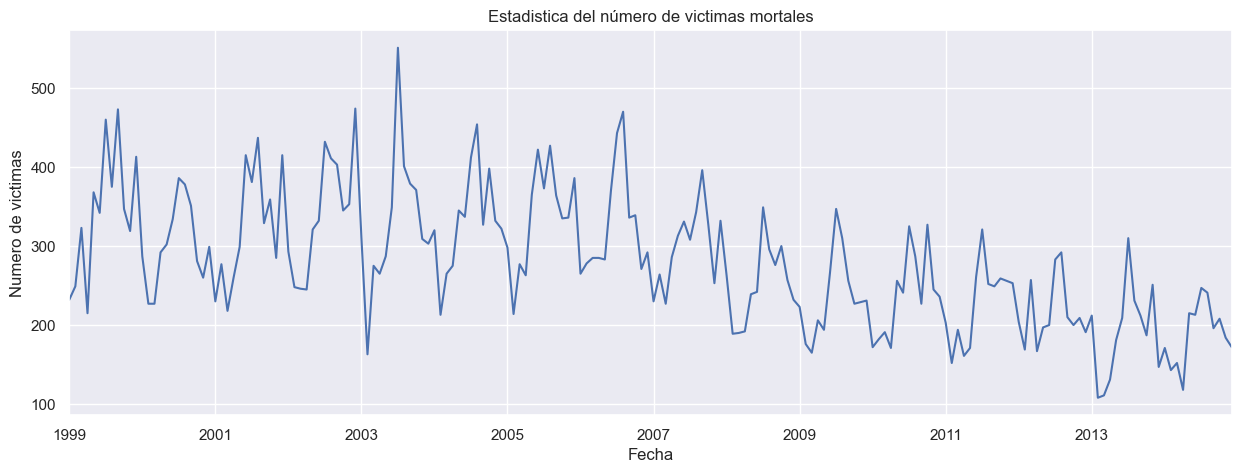

In [19]:
df1 = df.set_index('C_DATE')
df1
df1['fatalidad']=np.where(df1['C_SEV']==1,1,0)
df1['no_fatalidad']=np.where(df1['C_SEV']==2,1,0)

df1 = df1.groupby('C_DATE')['fatalidad','no_fatalidad'].sum()
df1

plot2 = df1['fatalidad'].plot(figsize=(15,5),title='Estadistica del número de victimas mortales')
plot2.set_xlabel("Fecha")
plot2.set_ylabel("Numero de victimas")

Text(0, 0.5, 'Numero de victimas')

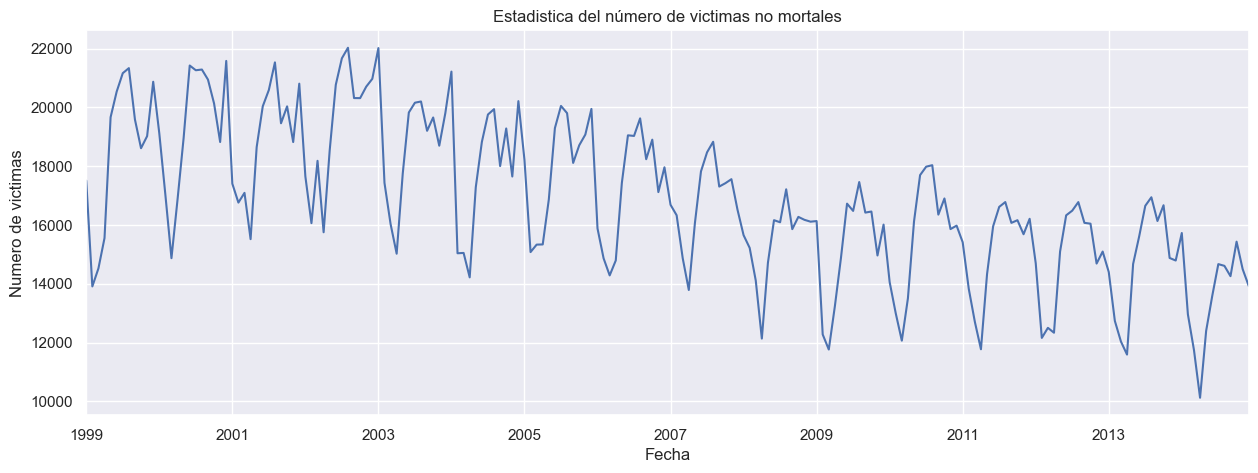

In [20]:
plot2 = df1['no_fatalidad'].plot(figsize=(15,5),title='Estadistica del número de victimas no mortales')
plot2.set_xlabel("Fecha")
plot2.set_ylabel("Numero de victimas")

Visualizando ambas gráficas, podemos concluir que el número de accidentes con víctimas mortales se ha reduccido con el paso de los años. 

**CONTEXTO DE LA COLISIÓN**

Veamos que tipo de colisión (un solo coche, varios coches, golpe por detrás, etc) es la más frecuente.

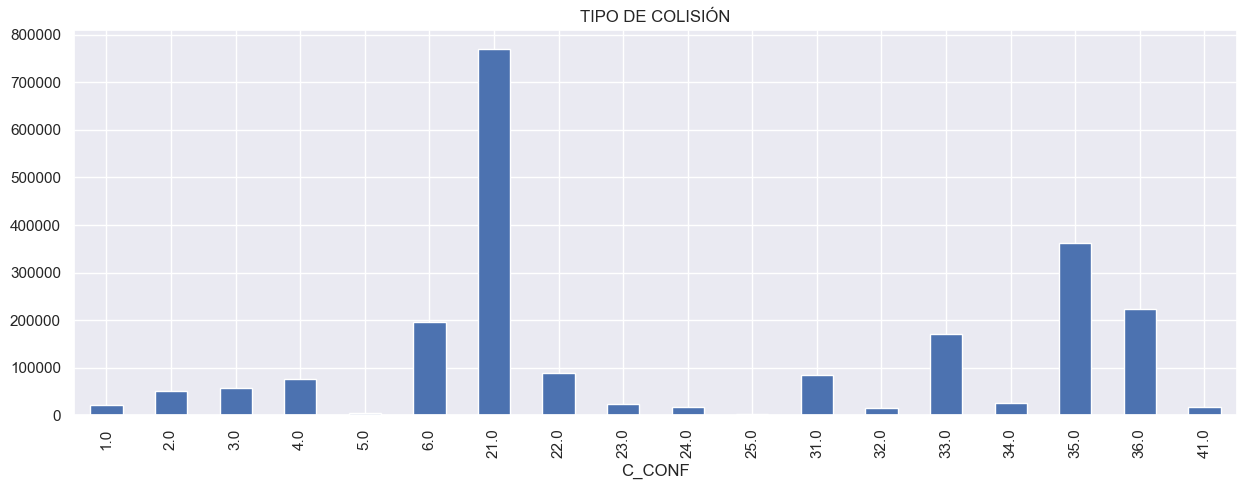

In [21]:
plt.figure(figsize=(15,5))
by_hour = df_c.groupby('C_CONF').size()
plot3 = by_hour.plot(kind='bar',title='TIPO DE COLISIÓN')

Con diferencia, la 21 es la configuración más frecuente. Si miramos en *driveLegend.pdf*, vemos que se corresponde a una colisión por detrás.

**CONFIGURACIÓN DE LA CALZADA**

Veamos si inlfuye o no en el número de accidentes.

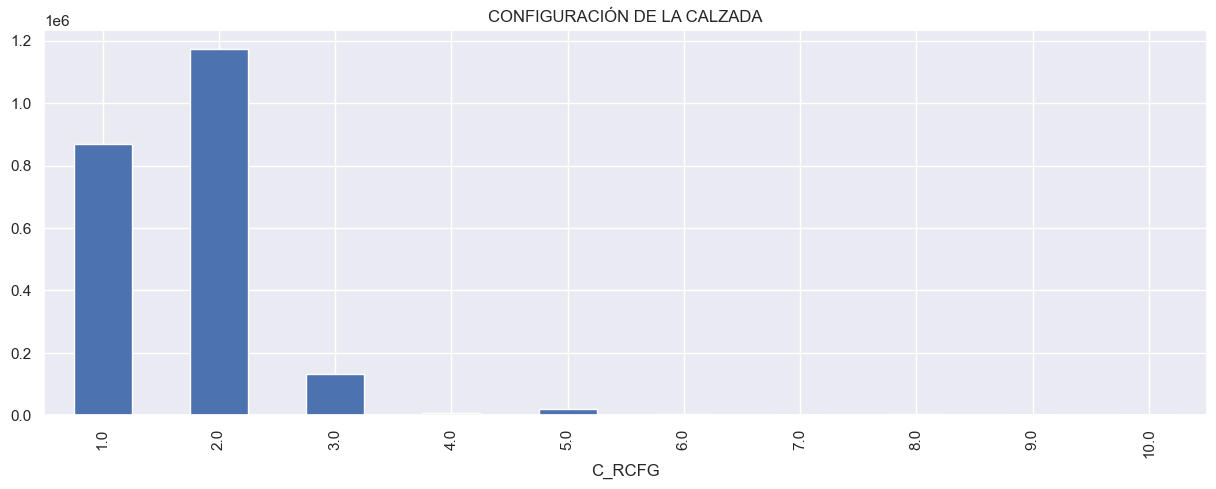

In [22]:
plt.figure(figsize=(15,5))
by_hour = df_c.groupby('C_RCFG').size()
plot3 = by_hour.plot(kind='bar',title='CONFIGURACIÓN DE LA CALZADA')

Con una amplia diferencia dominan el valor 2 y 1, que se corresponden a las intersecciones entra vías normales y 1 al resto de vías normales sin ser una intersección.

**CLIMA**

A priori creemos que el clima es un factor bastante determinante a la hora de producirse un accidente. Ya que si, por ejemplo, la calzada esta mojada o helada, la probabilidad de tener un accidente aumenta considerablemente. Comprobémoslo.

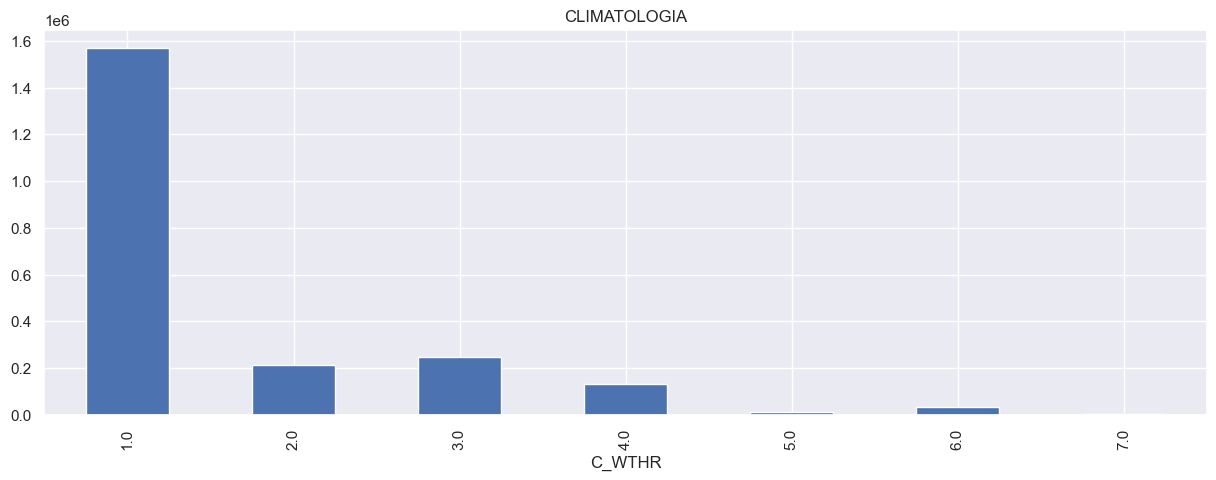

In [23]:
plt.figure(figsize=(15,5))
by_hour = df_c.groupby('C_WTHR').size()
plot3 = by_hour.plot(kind='bar',title='CLIMATOLOGIA')

Sin embargo, obtenemos que la mayoría de accidentes se producen en los días soleados. Bien es cierto que también hay barras significativas en los días nublados (2), lluviosos (3) y nevados (4)

**¿Cómo es esto posible?**

Si buscamos información sobre el clima de Canadá (en Toronto, ya que Canadá es muy extenso), observamos que aunque hay bastantes días de nevadas y precipitaciones, lo más frecuente son días despejados, y por lo tanto es normal que haya más acciedentes en días despejados (también es lógico pensar que cuando hay fuertes nevadas, heladas o lluvias la gente no sale tanto de casa por el frío y no coge tanto el coche)

Si pudiéremos obtener el número de días en los que hubo cada meteorología podríamos calcular la frecuencia relativa de cada uno de los valores y obtendríamos resultados mucho más realistas.

**ESTADO DE LA CALZADA**

Pasará lo mismo que en la anterior. Ya que, lo normal es que la calzada esté seca.

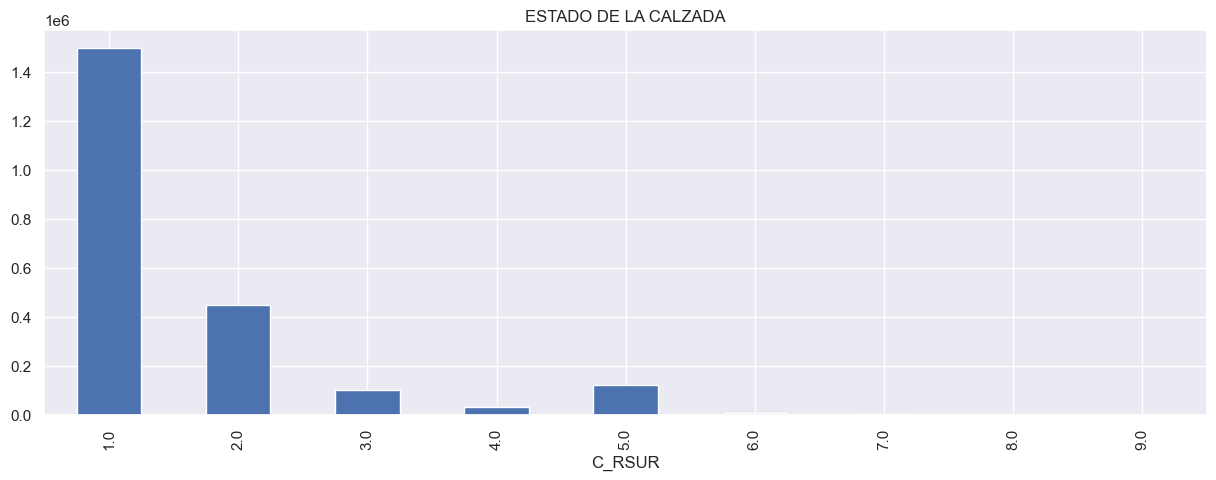

In [24]:
plt.figure(figsize=(15,5))
by_hour = df_c.groupby('C_RSUR').size()
plot3 = by_hour.plot(kind='bar',title='ESTADO DE LA CALZADA')

Como ya vaticinábamos, el resultado es el comentado. El razonamiento es el mismo que en el apartado anterior.

**¿INFLUYE EL ESTADO FÍSICO DE LA VÍA?**

Habría que tener en cuenta que Canadá es un país desarrollado y cabe esperar que la mayoría de sus carreteras estén en buen estado.

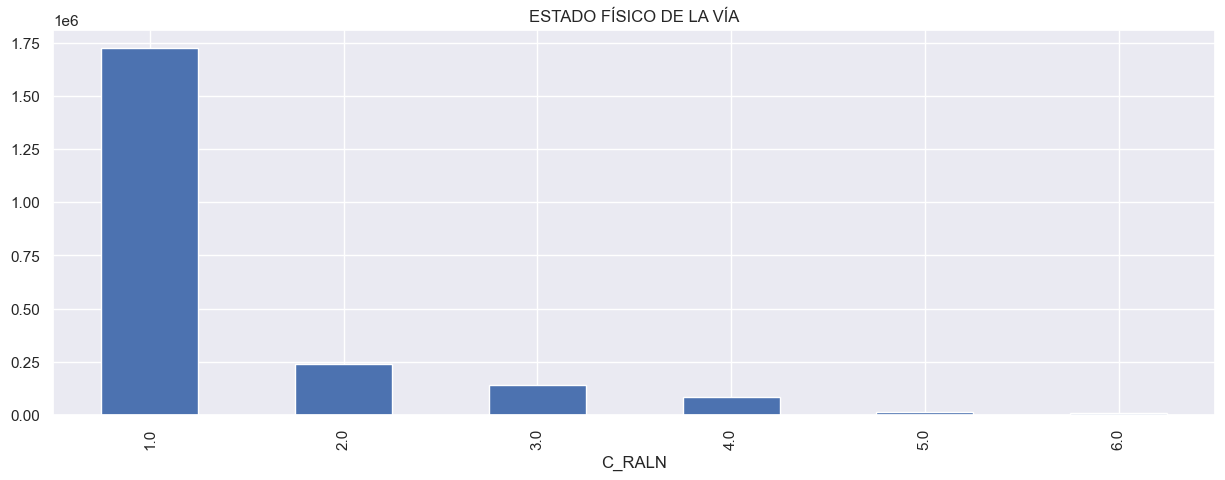

In [25]:
plt.figure(figsize=(15,5))
by_hour = df_c.groupby('C_RALN').size()
plot3 = by_hour.plot(kind='bar',title='ESTADO FÍSICO DE LA VÍA')

**RELACIÓN ENTRE 'P_ISEV' Y 'P_SAFE'**

In [26]:
contingency_table = pd.crosstab(df_c['P_ISEV'], df_c['P_SAFE'])
print(contingency_table)

P_SAFE   1.0      2.0    9.0   10.0  12.0  13.0
P_ISEV                                         
1.0      7597   922239   1076     1   789  2387
2.0     39723  1174017  31768    18  8797  7384
3.0      4536     8791   1197     0   177   132


Vemos que (por ejemplo), cuando P_SAFE = 1.0 (No utiliza medidas de seguridad), el número de que personas que necesita tratamiento (P_ISEV = 2.0) es mucho mayor que los que no necesitan tratamiento porque salen ilesos (1.0)

# SEGUNDA PARTE:
### ¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son más propensos a tener accidentes (acción correctiva en prima)?

Para ello, seguimos tomando el dataset con los conductores definido anteriormente df_c. Veamos primero si el sexo del conductor influye o no.

In [27]:
df_c['P_SEX'].value_counts()

1.0    1321295
0.0     889334
Name: P_SEX, dtype: int64

Aproximadamente el 40% de conductores implicados en accidentes son mujeres y el 60% hombres (no parece un factor determinante)

Veamos ahora las edades.

In [28]:
df_c['P_AGE'].value_counts().head(10)

19.0    62814
18.0    62494
20.0    60562
21.0    58169
22.0    55543
23.0    53748
17.0    52190
24.0    51117
25.0    50064
26.0    47935
Name: P_AGE, dtype: int64

Podemos observar que la franja de edad del conductor en la que los accidentes son más frecuentes es de 17 a 26. En estas edades es cuando el conductor es más inexperto, lo que ha podido llevar a este resultado.

In [29]:
df_c['V_TYPE'].value_counts()

1.0     1986295
6.0       70600
14.0      38007
8.0       33348
7.0       32984
5.0       28466
11.0      12781
9.0        3533
17.0       2274
23.0        962
18.0        858
10.0        270
21.0        251
Name: V_TYPE, dtype: int64

El tipo más frecuente (con mucha diferencia) es el tipo 1, que son los coches normales.Abarca alrededor del 90% del total de accidentes. Esto es razonable, ya que la mayoría de los vehículos que hay en las careteras son coches normales de uso personal.


**VARIABLE ANTIGÜEDAD**

Para ver cómo de antiguo era en el momento del accidente, creamos una nueva variable que sea la diferencia entre el año de la colisión y el año de fabricación del coche.

In [30]:
df_c = df_c.copy()
df_c.loc[:, 'V_AGE'] = df_c['C_YEAR'] - df_c['V_YEAR']

In [31]:
(df_c['V_AGE']< 0).value_counts()

False    2198077
True       12552
Name: V_AGE, dtype: int64



Observamos que en nuestra nueva variable aparecen valores negativos. Como esto no tiene sentido, eliminaremos estas observaciones.

In [32]:
df_c = df_c[df_c['V_AGE']  >= 0]
df_c.shape

(2198077, 24)

In [33]:
df_c['V_AGE'].value_counts().head(10)

1.0     163223
2.0     158764
4.0     153814
5.0     152337
3.0     152214
6.0     148292
7.0     143780
8.0     138892
9.0     134916
10.0    129333
Name: V_AGE, dtype: int64

Si nuestro objetivo es encontrar qué tipo de conductores y de vehículos son más propensos a tener un accidente, hemos mostrado ya las frecuencias para cada clase. Como queremos que resulte más sencilla su interpretación, diremos que el tipo de vehículo más frecuente en los accidentes es el 1 (con mucha diferencia) , que corresponde a los coches personales normales. 

Ahora, dividiremos las otras variables en clases que permitan entender mejor los resultados.

In [34]:
# Dividir la variable V_AGE en tres clases: coche nuevo, media edad y viejo
df_c['V_AGE_CLASS'] = pd.cut(df_c['V_AGE'], bins=[0, 5, 12, float('inf')], labels=['Nuevo', 'Medio', 'Viejo'])

# Dividir la variable P_AGE en tres clases: jóvenes, mediana edad y avanzada edad
df_c['P_AGE_CLASS'] = pd.cut(df_c['P_AGE'], bins=[16, 35, 60, 99], labels=['Joven', 'Mediana Edad', 'Avanzada Edad'])

In [35]:
df_c['V_AGE_CLASS'].value_counts()

Medio    923953
Nuevo    780352
Viejo    370742
Name: V_AGE_CLASS, dtype: int64

Vemos que la se producen más accidentes con coches de antigüedad media que en los nuevos o los viejos.

In [36]:
df_c['P_AGE_CLASS'].value_counts()

Mediana Edad     959593
Joven            950724
Avanzada Edad    268447
Name: P_AGE_CLASS, dtype: int64

El número de personas de mediana edad es casi igual que el de jóvenes. Sin embargo, hay muchos menos conductores de avanzada edad.

**¿QUÉ PASA SI LAS COMBINAMOS?**

Ahora vamos a ver la combinación de estas dos variables que más accidentes produce. Para ello, vamos a agrupar por V_AGE y P_AGE. No tendremos en cuenta V_TYPE, ya que hemos visto que dominaba el valor 1, correspondiente a los automóviles normales.

In [37]:
# Calcular las combinaciones más frecuentes
combinaciones_frecuentes = df_c.groupby(['V_AGE_CLASS', 'P_AGE_CLASS']).size().reset_index(name='Frecuencia')
combinaciones_frecuentes = combinaciones_frecuentes.sort_values('Frecuencia', ascending=False)

# Mostrar las combinaciones más frecuentes
print(combinaciones_frecuentes.head(10))


  V_AGE_CLASS    P_AGE_CLASS  Frecuencia
3       Medio          Joven      414858
4       Medio   Mediana Edad      389096
1       Nuevo   Mediana Edad      366625
0       Nuevo          Joven      310433
6       Viejo          Joven      172804
7       Viejo   Mediana Edad      147316
5       Medio  Avanzada Edad      111560
2       Nuevo  Avanzada Edad       97789
8       Viejo  Avanzada Edad       46028


Por lo tanto, las combinación más frecuente en el número de accidentes es:
- Vehículo familiar.
- La antigüedad del coche se encuentra entre los 5 y los 12 años.
- El conductor se encuentra entre los 16 y los 30 años.

Los resultados concuerdan con lo que hicimos anteriormente al verlas por separado, ya que, aunque había mas conductores de mediana edad, el número de jóvenes era prácticamente el mismo.


### ¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son menos propensos a tener accidentes (descuento en prima)?

Procedemos de igual manera

In [38]:
# Calcular las combinaciones menos frecuentes
combinaciones_menos_frecuentes = df_c.groupby(['V_AGE_CLASS', 'P_AGE_CLASS']).size().reset_index(name='Frecuencia')
combinaciones_menos_frecuentes = combinaciones_menos_frecuentes.sort_values('Frecuencia', ascending= True)

# Mostrar las combinaciones más frecuentes
print(combinaciones_menos_frecuentes.head(10))

  V_AGE_CLASS    P_AGE_CLASS  Frecuencia
8       Viejo  Avanzada Edad       46028
2       Nuevo  Avanzada Edad       97789
5       Medio  Avanzada Edad      111560
7       Viejo   Mediana Edad      147316
6       Viejo          Joven      172804
0       Nuevo          Joven      310433
1       Nuevo   Mediana Edad      366625
4       Medio   Mediana Edad      389096
3       Medio          Joven      414858


Tiene sentido porque en nuestros datos hay muchas menos personas de edad avanzada.

Si ahora queremos ver los tipos de coches menos frecuentes:

In [39]:
df_c['V_TYPE'].value_counts()

1.0     1975544
6.0       70326
14.0      37849
7.0       32598
8.0       32568
5.0       28356
11.0      12758
9.0        3473
17.0       2269
23.0        962
18.0        855
10.0        268
21.0        251
Name: V_TYPE, dtype: int64

Vemos que son los de tipo 21 (camiones de bomberos)

# TERCERA PARTE

### ¿Qué es lo que más contribuye a que existan fallecimientos en un accidente?

Para poder conocer las caracerísticas que más influyen en los fallecimientos, vamos a implementar un modelo de Random Forest, para poder ver qué atributos son los más importantes a la hora de predecir la ocurrencia o no ocurrencia de un fallecimiento.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [41]:
le = LabelEncoder()
df["C_SEV"] = le.fit_transform(df["C_SEV"])
df['C_SEV'].value_counts()

1    3238415
0      53876
Name: C_SEV, dtype: int64

Transformamos la variable que nos indica la fatalidad del accidente para que tome los valores 0 (si el accidente no ha dejado víctimas mortales) o 1 (si el accidente ha dejado víctimas mortales)

In [42]:
X = df.drop(['C_DATE', 'C_SEV', 'C_YEAR','C_MNTH', 'C_WDAY', 'C_HOUR', 'V_ID','P_ID'], axis=1)
y = df["C_SEV"]

Como hemos visto que la cantidad de accidentes fatales y no fatales está muy desbalanceada, vamos a aplicar el método de balanceo undersampling, ya que tener una variable objetivo desbalanceada nos llevaría a predicciones erróneas.

In [43]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler()
X_over, y_over = undersample.fit_resample(X, y)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80814, 15), (26938, 15), (80814,), (26938,))

### APLICAMOS RANDOM FOREST

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Creamos el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)

# Entrenamos el modelo
rf.fit(X_train, y_train.ravel())

# Hacemos predicciones en los datos de prueba
y_pred = rf.predict(X_test)

# Evaluamos el rendimiento del modelo
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

Accuracy:  0.8179894572722548


In [46]:
# Obtenemos la importancia de las variables
importances = rf.feature_importances_

# Creamos un DataFrame con las variables y sus importancias
feature_importances = pd.DataFrame({'Variable': X_train.columns, 'Importancia': importances})

# Ordenamos el DataFrame por importancia descendente
feature_importances = feature_importances.sort_values('Importancia', ascending=False)

# Imprimimos el ranking de importancia de las variables
print(feature_importances)

   Variable  Importancia
12   P_ISEV     0.208519
10    P_AGE     0.159954
1    C_CONF     0.137588
8    V_YEAR     0.135599
6    C_TRAF     0.054194
2    C_RCFG     0.042980
0    C_VEHS     0.042751
13   P_SAFE     0.040449
7    V_TYPE     0.036086
5    C_RALN     0.033905
3    C_WTHR     0.029410
4    C_RSUR     0.027923
11    P_PSN     0.026477
9     P_SEX     0.014618
14   P_USER     0.009549


Con esto, podemos conluir que las variables que más contribuyen a que haya fallecimientos son:

* **P_ISEV**: nos indica si el pasajero ha necesitado o no tratamiento médico. Esto es razonable, ya que una víctima que necesite tratamiento médico es mucho mas probable que fallezca que una que no lo necesita.

* **P_AGE**: nos indica la edad de la víctima. Tiene sentido, puesto que la resistencia y la capacidad de recuperación de una persona depende en gran medida de la edad que tenga.

* **C_CONF**: nos indica el tipo de colisión. Es razonable puesto que distintos tipos de colisiones conllevas distintos niveles de peligro para los pasajeros.

* **V_YEAR**: nos indica el año del vehículo. También tiene sentido, ya que un coche viejo va a tener las medidas de seguridad mas deterioradas, lo que puede llevar a una mayor probabilidad de fallecimiento.

# CUARTA PARTE:

### Dado un accidente, ¿se puede generar un modelo que prediga si habrá fallecimientos o no? ¿Si se va a necesitar tratamiento médico o no? Las aseguradoras tienen que inmovilizar capital para pagar estas casuísticas. 

Veamos primero que carácterísticas son más importantes a la hora de predecir si habrá fallecimientos o no.

### 1.  REGRESIÓN LOGÍSTICA

In [48]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report

# Creamos un clasificador de regresión logística
clf = LogisticRegression(max_iter=1000)

clf.fit(X_train, y_train)

# Hacemos predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Evaluamos el rendimiento del modelo
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

Accuracy:  0.7272254807335363


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72     13456
           1       0.72      0.74      0.73     13482

    accuracy                           0.73     26938
   macro avg       0.73      0.73      0.73     26938
weighted avg       0.73      0.73      0.73     26938



### 2. KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

# Creamos el modelo KNN
knn = KNeighborsClassifier(n_neighbors=3, metric="minkowski")

# Entrenamos el modelo
knn.fit(X_train, y_train.ravel())

# Hacemos predicciones en los datos de prueba
y_pred = knn.predict(X_test)

# Evaluamos el rendimiento del modelo
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

C:\Users\mariq\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy:  0.7290815947731829


In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73     13456
           1       0.72      0.74      0.73     13482

    accuracy                           0.73     26938
   macro avg       0.73      0.73      0.73     26938
weighted avg       0.73      0.73      0.73     26938



### 3. ÁRBOL DE DECISIÓN

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn import metrics 

# Creamos el modelo:
arbol = DecisionTreeClassifier(random_state=0,max_depth=50)

# Entrenamos el modelo
arbol.fit(X_train, y_train)

# Hacemos predicciones en los datos de prueba
y_pred = arbol.predict(X_test)

# Evaluamos el rendimiento del modelo
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

Accuracy:  0.7626030143292004


In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76     13456
           1       0.77      0.75      0.76     13482

    accuracy                           0.76     26938
   macro avg       0.76      0.76      0.76     26938
weighted avg       0.76      0.76      0.76     26938



### 4. RANDOM FOREST

In [54]:
from sklearn.ensemble import RandomForestClassifier

# Creamos el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)

# Entrenamos el modelo
rf.fit(X_train, y_train.ravel())

# Hacemos predicciones en los datos de prueba
y_pred = rf.predict(X_test)

# Evaluamos el rendimiento del modelo
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

Accuracy:  0.8179894572722548


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81     13456
           1       0.81      0.84      0.82     13482

    accuracy                           0.82     26938
   macro avg       0.82      0.82      0.82     26938
weighted avg       0.82      0.82      0.82     26938



### 5. BAGGING

In [56]:
from sklearn.ensemble import BaggingClassifier

# Creamos el modelo de Bagging con 10 estimadores
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)

# Ajustamos el modelo a los datos de entrenamiento
bagging.fit(X_train, y_train.ravel())

# Realizamos predicciones sobre el conjunto de prueba
y_pred = bagging.predict(X_test)

# Evaluamos el rendimiento del modelo
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

TypeError: __init__() got an unexpected keyword argument 'estimator'

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81     13456
           1       0.81      0.84      0.82     13482

    accuracy                           0.82     26938
   macro avg       0.82      0.82      0.82     26938
weighted avg       0.82      0.82      0.82     26938



### 6. GRADIENT BOOST

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

# Creamos el modelo y ajustarlo a los datos de entrenamiento
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train.ravel())

# Realizamos predicciones en el conjunto de prueba
y_pred = gb.predict(X_test)

# Evaluamos el rendimiento del modelo
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

Accuracy:  0.8139060063850323


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80     13456
           1       0.78      0.88      0.83     13482

    accuracy                           0.81     26938
   macro avg       0.82      0.81      0.81     26938
weighted avg       0.82      0.81      0.81     26938



### 7. XGBoost

In [62]:
import xgboost as xgb

# Creamos el objeto del modelo XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', seed=42)

# Creamos el objeto LabelEncoder
label_encoder = LabelEncoder()

# Codificamos las etiquetas de entrenamiento
y_train_encoded = label_encoder.fit_transform(y_train)

# Entrenamos el modelo con los datos de entrenamiento codificados
xgb_model.fit(X_train, y_train_encoded)

# Realizamos predicciones en los datos de prueba
y_pred_encoded = xgb_model.predict(X_test)

# Decodificamos las predicciones
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluamos el rendimiento del modelo
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

Accuracy:  0.8275298834360383


In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82     13456
           1       0.80      0.87      0.83     13482

    accuracy                           0.83     26938
   macro avg       0.83      0.83      0.83     26938
weighted avg       0.83      0.83      0.83     26938



Es el algoritmo que mejores resultados arroja. Veamos la curva ROC y el AUC para establecer conclusiones.


C:\Users\mariq\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


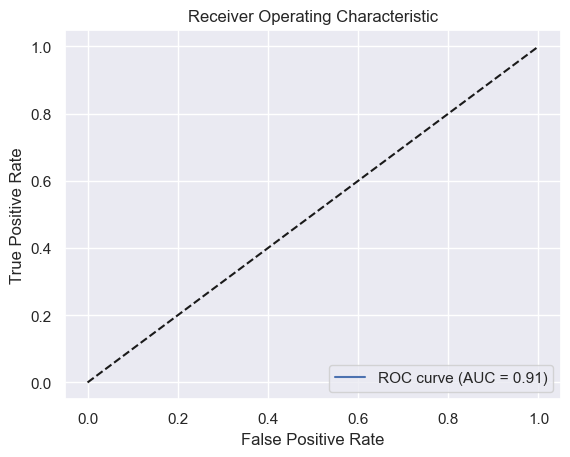

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculamos las probabilidades de predicción para la clase positiva (clase 2)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calculamos la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=2)

# Calculamos el área bajo la curva ROC (AUC)
auc = roc_auc_score(y_test, y_pred_proba)

# Graficamos la curva ROC
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal para referencia
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


Tras implantar estos algoritmos y validar los resultados que nos ofrecen, concluimos que el que más se adecúa a nuestro modelo es XGBoost, ya que presenta unas métricas mejores que los demás.

# ¿SE NECESITA TRATAMIENTO MÉDICO O NO?

Veamos primero los valores de la variable que indica si el afectado necesitará tratamiento médico o no.

In [65]:
df['P_ISEV'].value_counts()

2.0    1856027
1.0    1415144
3.0      21120
Name: P_ISEV, dtype: int64

Si miramos en la leyenda, se corresponden a:

- **1.0**: Ilesos
- **2.0**: Heridos, necesitan tratamiento
- **3.0**: Fallecimiento al instante o casi al instante. 

Observamos que los que pertenecen a la categoría 1 y a la 3 no necesitan tratamiento. Entonces vamos a crear una nueva variable, donde la clase 1 sea la clase en la que no se necesita tratamiento y la 2 en la que sí.

In [66]:
df['TRATAMIENTO'] = df['P_ISEV'].apply(lambda x: 1 if x == 1 or x == 3 else 2)
df['TRATAMIENTO'].value_counts()

2    1856027
1    1436264
Name: TRATAMIENTO, dtype: int64

Como está balanceado, en este caso no será necesario hacer el undersampling. Como la cantidad de datos es muy elevada, tomaremos una semilla. Ya que, de no hacerlo así, los algoritmos tardarían muco en ejecutar y el coste computacional sería muy elevado. 

In [67]:
sample_size = 100000

random_seed = 42

df_sample = df.sample(n=sample_size, random_state=random_seed)


In [68]:
df_sample['TRATAMIENTO'].value_counts()

2    56211
1    43789
Name: TRATAMIENTO, dtype: int64

Está balanceado. Partimos el dataset en conjunto de entrenamiento y prueba y repetimos algoritmos.

In [69]:
X = df_sample.drop(['C_DATE', 'P_ISEV', 'C_YEAR','C_MNTH', 'C_WDAY', 'C_HOUR', 'V_ID','P_ID', 'TRATAMIENTO'], axis=1)
y = df_sample["TRATAMIENTO"]


X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75000, 15), (25000, 15), (75000,), (25000,))

### 1. REGRESIÓN LOGÍSTICA

In [70]:
from sklearn.linear_model import LogisticRegression 

# Creamos un clasificador de regresión logística
clf = LogisticRegression(max_iter=100000)

clf.fit(X_train, y_train)

# Hacemos las predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Evaluamos el rendimiento del modelo
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

Accuracy:  0.61752


In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.59      0.45      0.51     11024
           2       0.63      0.75      0.69     13976

    accuracy                           0.62     25000
   macro avg       0.61      0.60      0.60     25000
weighted avg       0.61      0.62      0.61     25000



### 2. KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier

# Creamos el modelo KNN
knn = KNeighborsClassifier(n_neighbors=3, metric="minkowski")

# Entrenamos el modelo
knn.fit(X_train, y_train.ravel())

# Hacemos predicciones en los datos de prueba
y_pred = knn.predict(X_test)

# Evaluamos el rendimiento del modelo
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

C:\Users\mariq\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy:  0.57676


In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.52      0.49      0.51     11024
           2       0.62      0.64      0.63     13976

    accuracy                           0.58     25000
   macro avg       0.57      0.57      0.57     25000
weighted avg       0.57      0.58      0.58     25000



### 3. ÁRBOL DE DECISIÓN


In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn import metrics 

# Creamos el modelo 
arbol = DecisionTreeClassifier(random_state=0,max_depth=50)

# Entrenamos el modelo
arbol.fit(X_train, y_train)

# Hacemos predicciones en los datos de prueba
y_pred = arbol.predict(X_test)

# Evaluamos el rendimiento del modelo
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

Accuracy:  0.57596


In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.52      0.53      0.52     11024
           2       0.62      0.61      0.62     13976

    accuracy                           0.58     25000
   macro avg       0.57      0.57      0.57     25000
weighted avg       0.58      0.58      0.58     25000



### 4. RANDOM FOREST

In [76]:
from sklearn.ensemble import RandomForestClassifier

# Creamos el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)

# Entrenamos el modelo
rf.fit(X_train, y_train.ravel())

# Hacemos predicciones en los datos de prueba
y_pred = rf.predict(X_test)

# Evaluamos el rendimiento del modelo
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

Accuracy:  0.62344


In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.58      0.54      0.56     11024
           2       0.65      0.69      0.67     13976

    accuracy                           0.62     25000
   macro avg       0.62      0.61      0.61     25000
weighted avg       0.62      0.62      0.62     25000



### 5. BAGGING

In [78]:
from sklearn.ensemble import BaggingClassifier

# Creamos el modelo de Bagging con 10 estimadores
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)

# Ajustamos el modelo a los datos de entrenamiento
bagging.fit(X_train, y_train.ravel())

# Realizamos predicciones sobre el conjunto de prueba
y_pred = bagging.predict(X_test)

# Evaluamos el rendimiento del modelo
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

TypeError: __init__() got an unexpected keyword argument 'estimator'

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.58      0.54      0.56     11024
           2       0.65      0.69      0.67     13976

    accuracy                           0.62     25000
   macro avg       0.62      0.61      0.61     25000
weighted avg       0.62      0.62      0.62     25000



### 6. GRADIENT BOOST

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

# Creamos el modelo y lo ajustamos a los datos de entrenamiento
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train.ravel())

# Realizamos predicciones en el conjunto de prueba
y_pred = gb.predict(X_test)

# Evaluamos el rendimiento del modelo
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

Accuracy:  0.65576


In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.58      0.60     11024
           2       0.68      0.72      0.70     13976

    accuracy                           0.66     25000
   macro avg       0.65      0.65      0.65     25000
weighted avg       0.65      0.66      0.65     25000



### 7. XGBoost

In [82]:
import xgboost as xgb
from sklearn import preprocessing, metrics

# Codificamos las etiquetas de clase
label_encoder = preprocessing.LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Crear el objeto del modelo XGBoost para clasificación multiclase
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, seed=42)

# Entrenamos el modelo con los datos de entrenamiento codificados
xgb_model.fit(X_train, y_train_encoded)

# Realizamos predicciones en los datos de prueba
y_pred_encoded = xgb_model.predict(X_test)

# Decodificamos las predicciones
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluamos el rendimiento del modelo
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

Accuracy:  0.65812


In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.57      0.60     11024
           2       0.68      0.73      0.70     13976

    accuracy                           0.66     25000
   macro avg       0.65      0.65      0.65     25000
weighted avg       0.66      0.66      0.66     25000



### HACER UNAS BUENAS CONCLUSIONES DEL TRABAJO

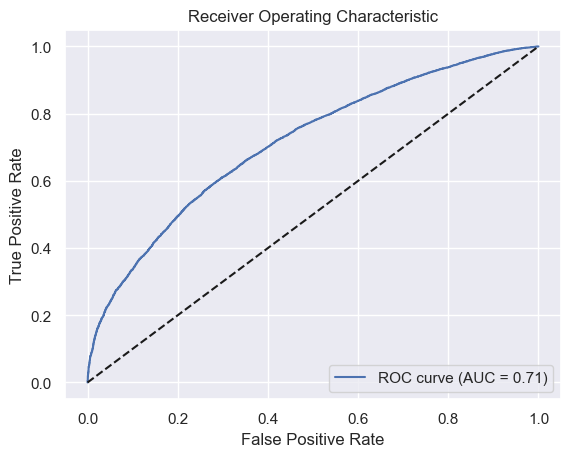

In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculamos las probabilidades de predicción para la clase positiva (clase 2)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calculamos la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=2)

# Calculamos el área bajo la curva ROC (AUC)
auc = roc_auc_score(y_test, y_pred_proba)

# Graficamos la curva ROC
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal para referencia
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

De nuevo, concluimos que el mejor modelo es el que nos proporciona XGBoost

# CONCLUSIONES

* El número de colisiones ha descendido ligeramente a lo largo de los años, al igual que las víctimas mortales. Esto puede estar explicado por la mejora de la sanidad y del estado de las carreteras.

* El mayor número de colisiones corresponde a los vehículos de entre 5 y 12 años y a las personas de entre 16 y 30 años. Siendo en ambos casos el vehículo predominante el de uso personal.

* El menor número de colisiones corresponde a los conductores de avanzada edad con coches de más de 12 años. Esto puede deberse a que abundan menos en las carreteras

* La variables que más influyen en los fallecimientos de las victimas son: la edad de la víctima, la edad del coche, el tipo de colision y si el paciente ha necesitado tratamiento médico.

* El modelo que mejor se ajusta a nuestros datos para predecir los fallecimientos es XGBoost

* El modelo que mejor se ajusta a nuestros datos para predecir la nacesidad de tratamiento médico es también el XGBoost.